Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

Problem 1B:

1.What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

2.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

3.Explain the business implications of performing ANOVA for this particular case study.
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline


In [4]:
sal_df = pd.read_csv("SalaryData.csv")

In [5]:
sal_df

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [6]:
sal_df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [7]:
sal_df.shape

(40, 3)

In [8]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [9]:
sal_df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [10]:
sal_df.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

In [11]:
sal_df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [12]:
sal_df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

# Null and Alternate Hypothesis for one way ANOVA (EDUCATION):

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

    
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

# Null and Alternate Hypothesis for one way ANOVA(Occupation):

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

    
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

## 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

    
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

In [13]:
formula = 'Salary ~ C(Education)'
model = ols(formula, sal_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [14]:
aov_table

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

Since the p value is less than the significance level, we can reject the null hupothesis. 

<AxesSubplot:xlabel='Education', ylabel='Salary'>

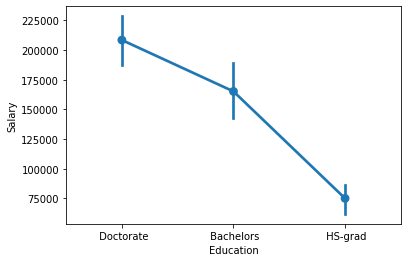

In [15]:
sns.pointplot(x='Education', y='Salary', data=sal_df)

Since the p value = 1.257709e-08 is less than the significance level, we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

    
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

In [16]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, sal_df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [17]:
aov_table

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

Since the p value = 0.458508 is greater than the significance level, we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

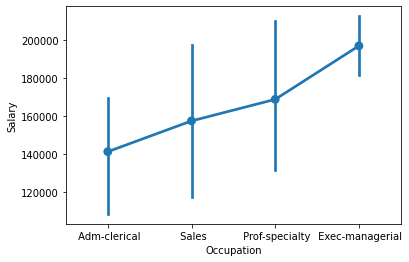

In [39]:
sns.pointplot(x='Occupation', y='Salary', data=sal_df)

## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [18]:
import scipy
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [21]:
mc = MultiComparison(sal_df['Salary'],sal_df['Education'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

This table shows that the p_value(p-adj) is less than the significance level (alpha = 0.05) for all the three categories in Education.

Hence, the mean salary across all 3 Categories of Education are different.

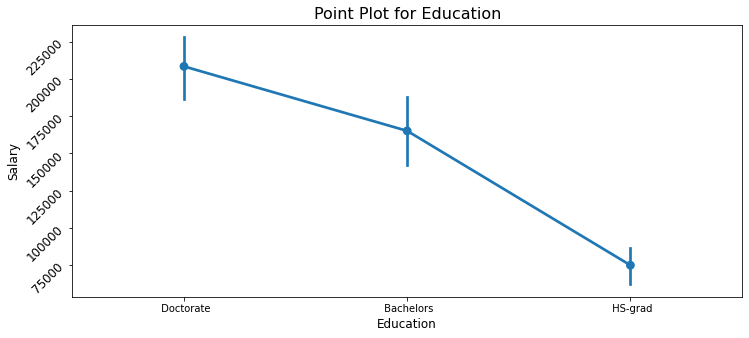

In [20]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Education', y='Salary', data=sal_df)
plt.title('Point Plot for Education', fontsize=16)
plt.xticks(fontsize=10)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Salary',fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.savefig('Point Plot for Education.png')

In [24]:
mc = MultiComparison(sal_df['Salary'],sal_df['Occupation'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

This table shows that the p_value(p-adj) is greater than the significance level (alpha = 0.05) for all the four categories in Occupation.

Hence, Salary across all 4 categories of Occupation are same.

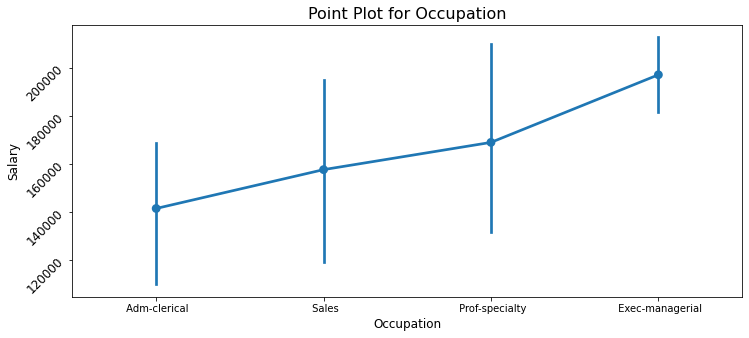

In [56]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Occupation', y='Salary', data=sal_df)
plt.title('Point Plot for Occupation', fontsize=16)
plt.xticks(fontsize=10)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Salary',fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.savefig('Point Plot for Occupation.png')

## 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

### The interaction plot below shows that, there is a significant amount of interaction between the two categorical variables, Education and Occupation.


In [58]:
#sns.pointplot(x='Occupation', y='Salary', hue='Education', data=sal_df, ci=False)

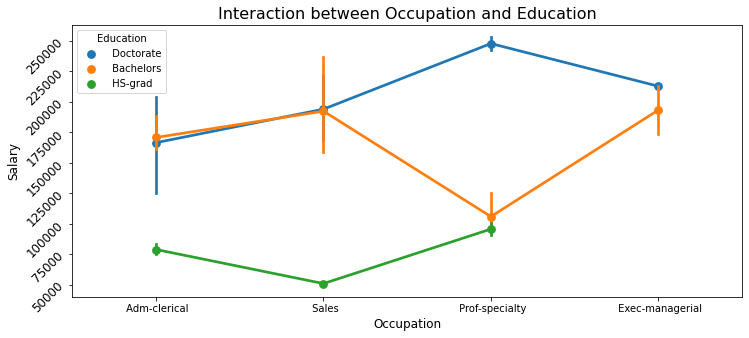

In [57]:
plt.figure(figsize=(12,5))
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=sal_df)
plt.title('Interaction between Occupation and Education', fontsize=16)
plt.xticks(fontsize=10)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Salary',fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.savefig('Point Plot Occupation-Education.png')

Analyzing the effects of one variable on the other from the interaction plot:
    
>* People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.

>* People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from 170000–190000).

>* People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.

>* People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reversal in this part of the plot.

>* Similarly, people with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupation Exec-Managerial whereas people with education as Doctorate and occupation as Prof-Specialty earn higher than people with education as Doctorate and occupation Exec-Managerial. There is a reversal in this part of the plot too.

>* Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.

>* Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.

>* Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.

>* People with education as HS -Grad earn the minimum salaries.

>* There are no people with education as HS -grad who hold Exec-managerial occupation.

>* People with education as Bachelors and occupation, Sales and Exec-Managerial earn the same salaries.


## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ (i. e. there is no interaction effect between the 2 independent variables, education and occupation).

𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [18]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education) : C(Occupation)'
model   = ols(formula, sal_df).fit()
aov_table= anova_lm(model)
aov_table

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

 From two way ANOVA, we can see that there is a significant amount of interaction between the variables, Education and Occupation.

Since, p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.

Hence. wecan now see that there is an interaction effect between the variables education and occupation on the mean salary.

## 1.7 Explain the business implications of performing ANOVA for this particular case study.

From the Analysis of Variance ANOVA method, we can observe that combination of Education-Occupation results in higher salaries.

It is clear that, People with Educational Qualification as Doctorate draw the maximum salaries.

People with Educational Qualification High School grad (HS Grad) draw the minimum (least) salaries.

Salary is dependent on Educational  Qualifications and Occupation.


Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

Is scaling necessary for PCA in this case? Give justification and perform scaling.

Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [50]:
pip install dataframe_image

In [2]:
import dataframe_image as dfi

In [19]:
std_df = pd.read_csv("Education+-+Post+12th+Standard.csv")
std_df

Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 18 columns]

In [20]:
 std_df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [21]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [6]:
std_df.shape

(777, 18)

In [7]:
PCA_df= std_df.select_dtypes(exclude='object')

In [9]:
PCA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [8]:
PCA_df.isnull().sum()

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [10]:
dups = PCA_df.duplicated()
dups.sum()

0

In [22]:
PCA_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [23]:
PCA_df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [41]:
def univariate_analysis(col):
    print('Description for',col)
    print(PCA_df[col].describe())
    print('')
    print('Boxplot for', col)
    sns.boxplot(x=col, data=PCA_df)
    plt.show()
    print('')
    print('Distribution for', col)
    sns.distplot(PCA_df,kde=True)
    plt.show()

Description for Apps
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

Boxplot for Apps


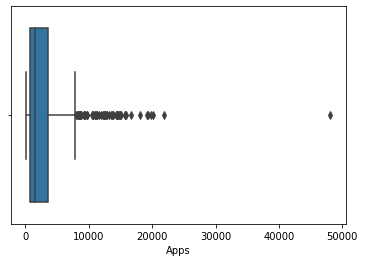


Distribution for Apps


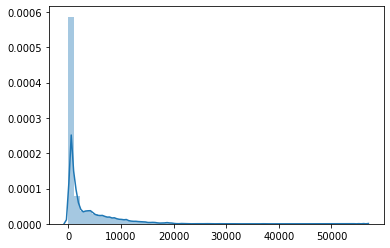

In [42]:
univariate_analysis('Apps')

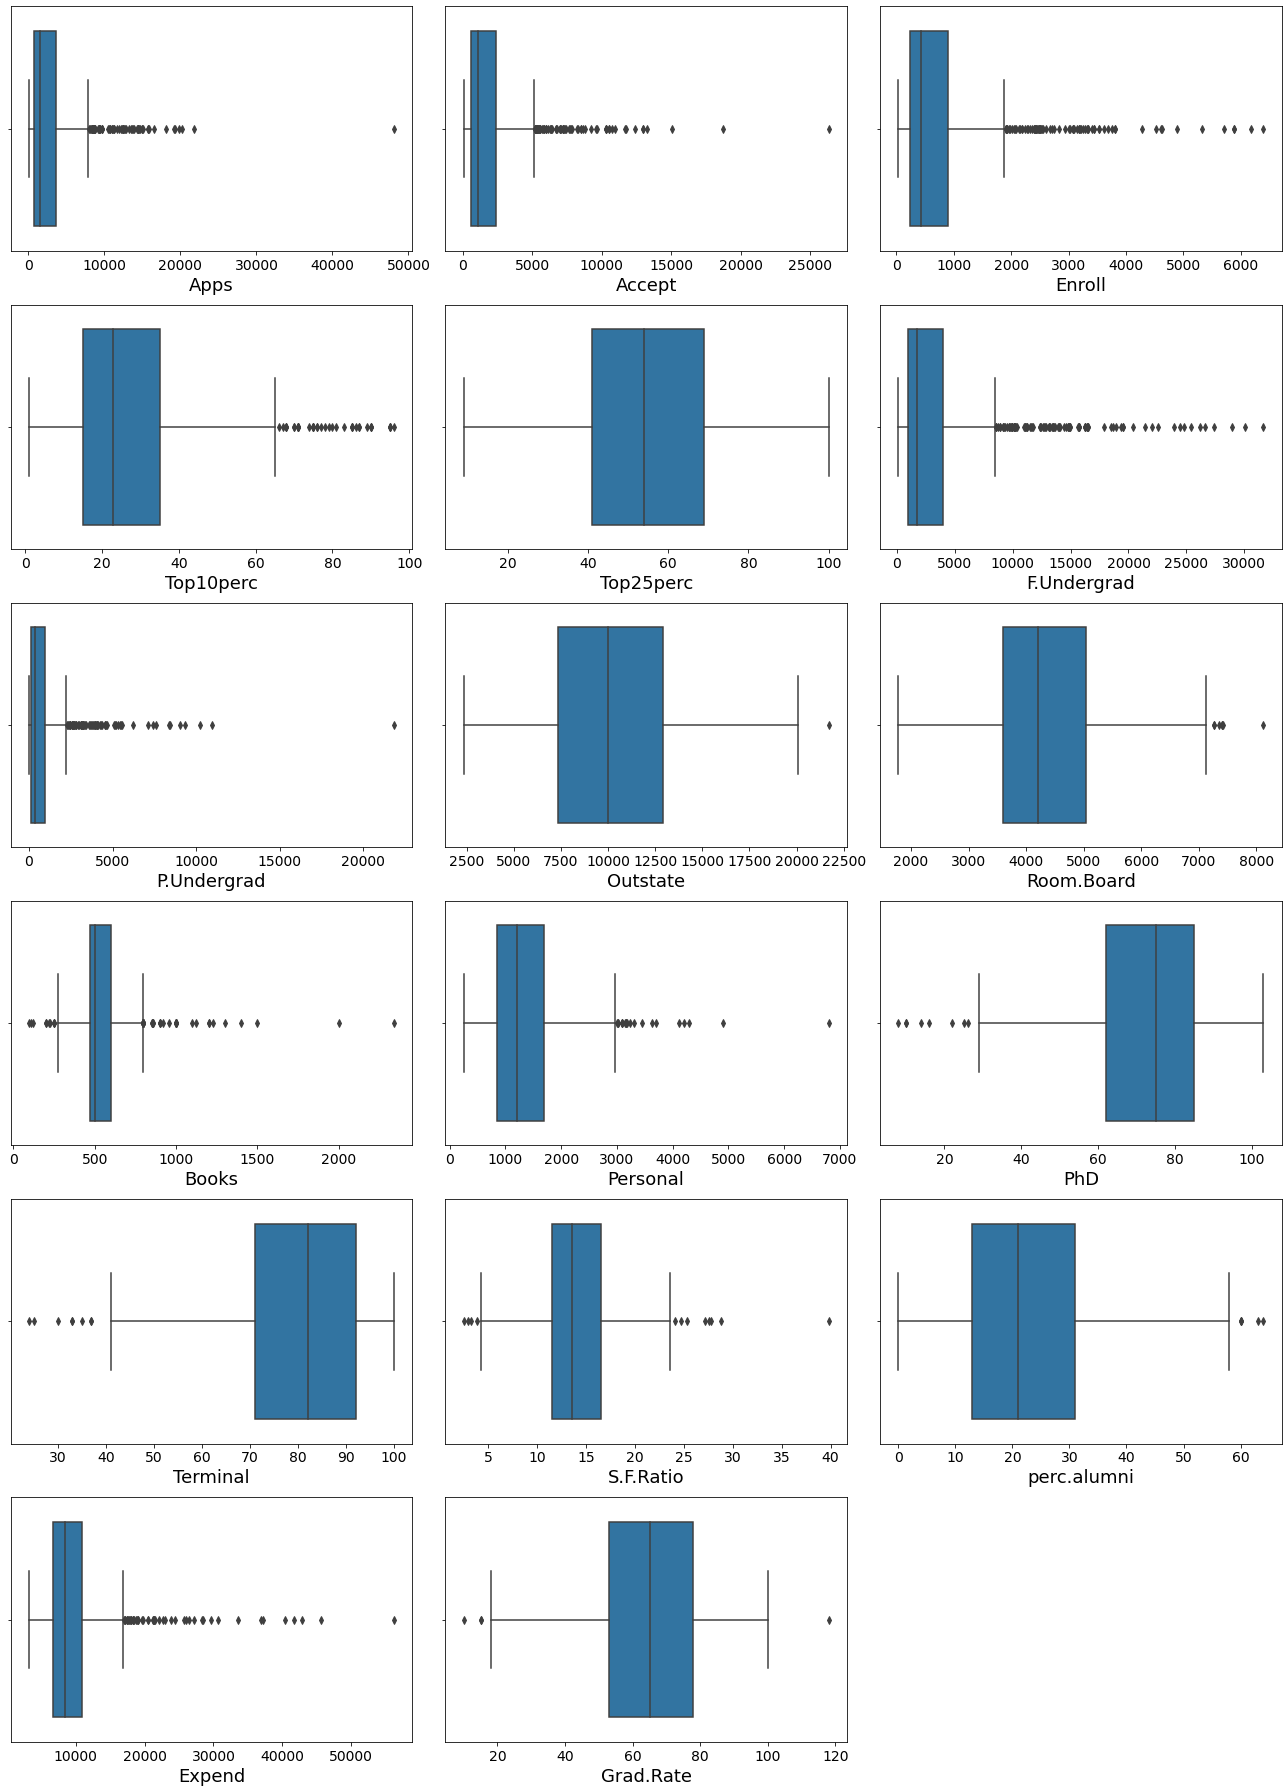

In [43]:
plt.figure(figsize=(18,25))
for i in np.arange(len(PCA_df.columns)):
    plt.subplot(6,3, i+1)
    sns.boxplot(x=PCA_df.columns[i], data=PCA_df)
    plt.xticks(fontsize=14)
    plt.xlabel('{}'.format(PCA_df.columns[i]),fontsize=18)
    plt.tight_layout()
plt.savefig('Boxplot.png')

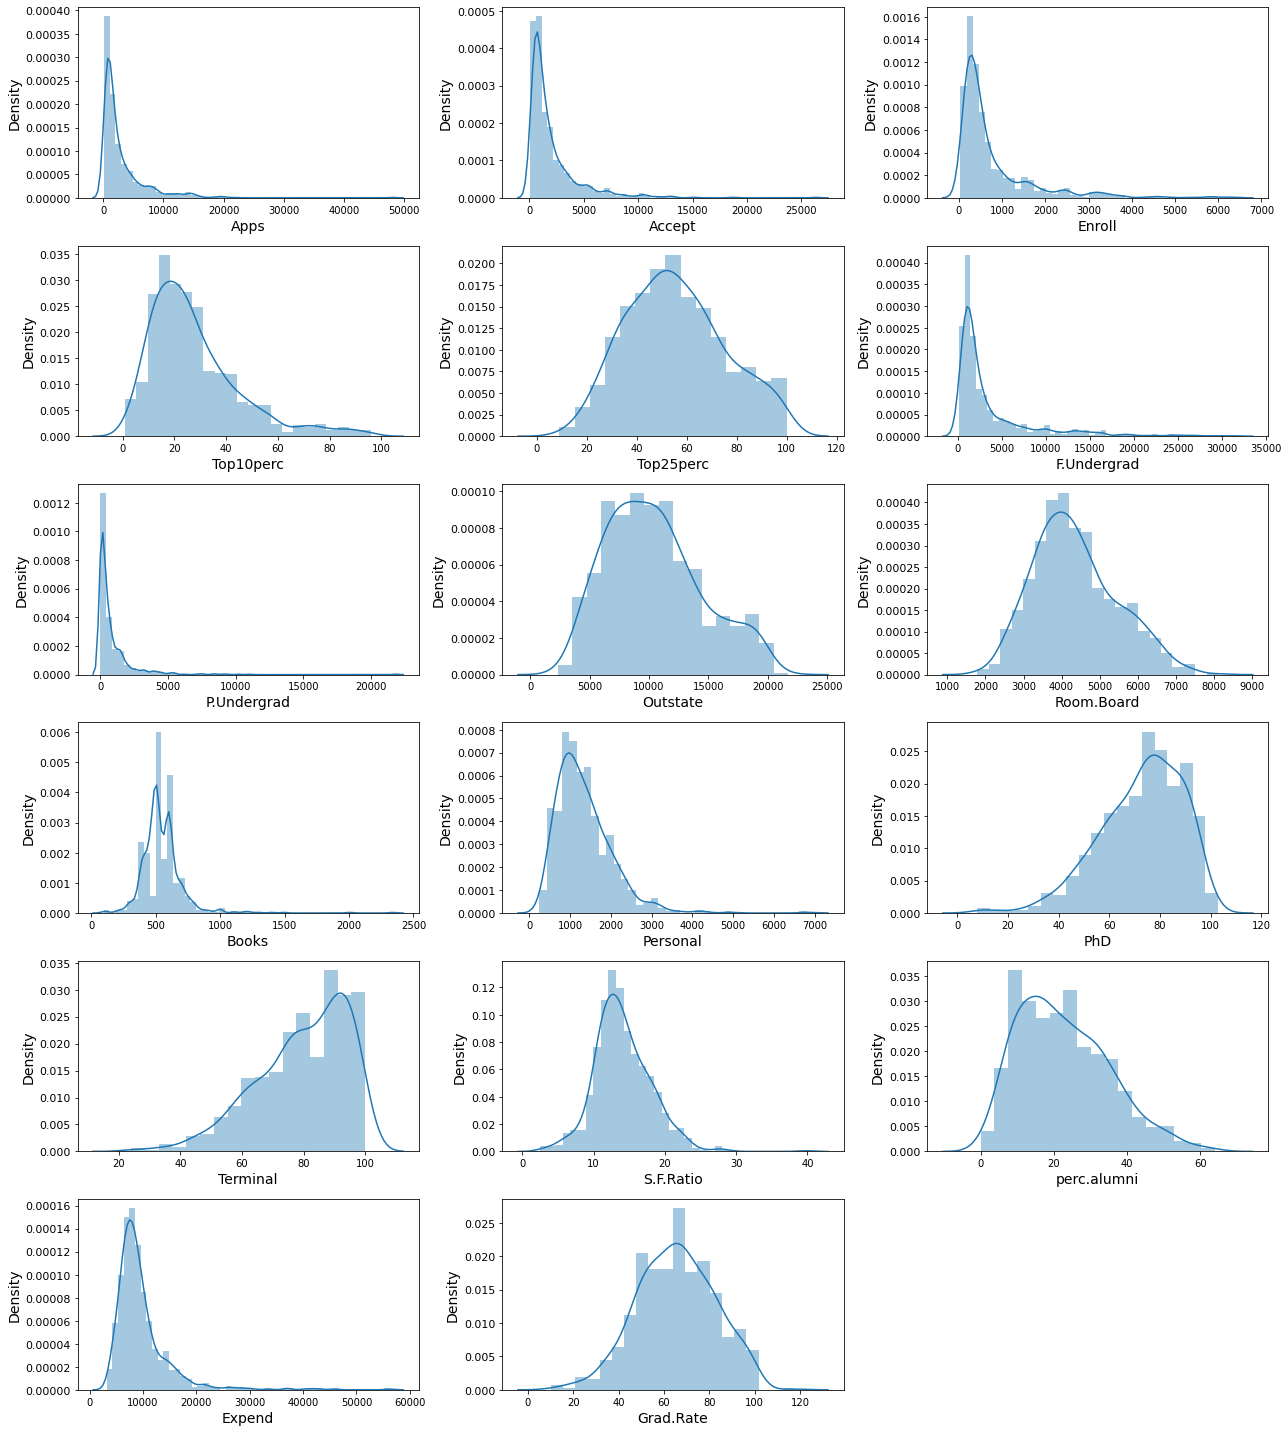

In [16]:
plt.figure(figsize=(18,20))
for i in np.arange(len(PCA_df.columns)):
    plt.subplot(6,3, i+1)
    sns.distplot(PCA_df.iloc[:,i],kde=True)
    plt.xlabel(PCA_df.columns[i],fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=11)
    plt.tight_layout()
plt.savefig('Distplot.png')

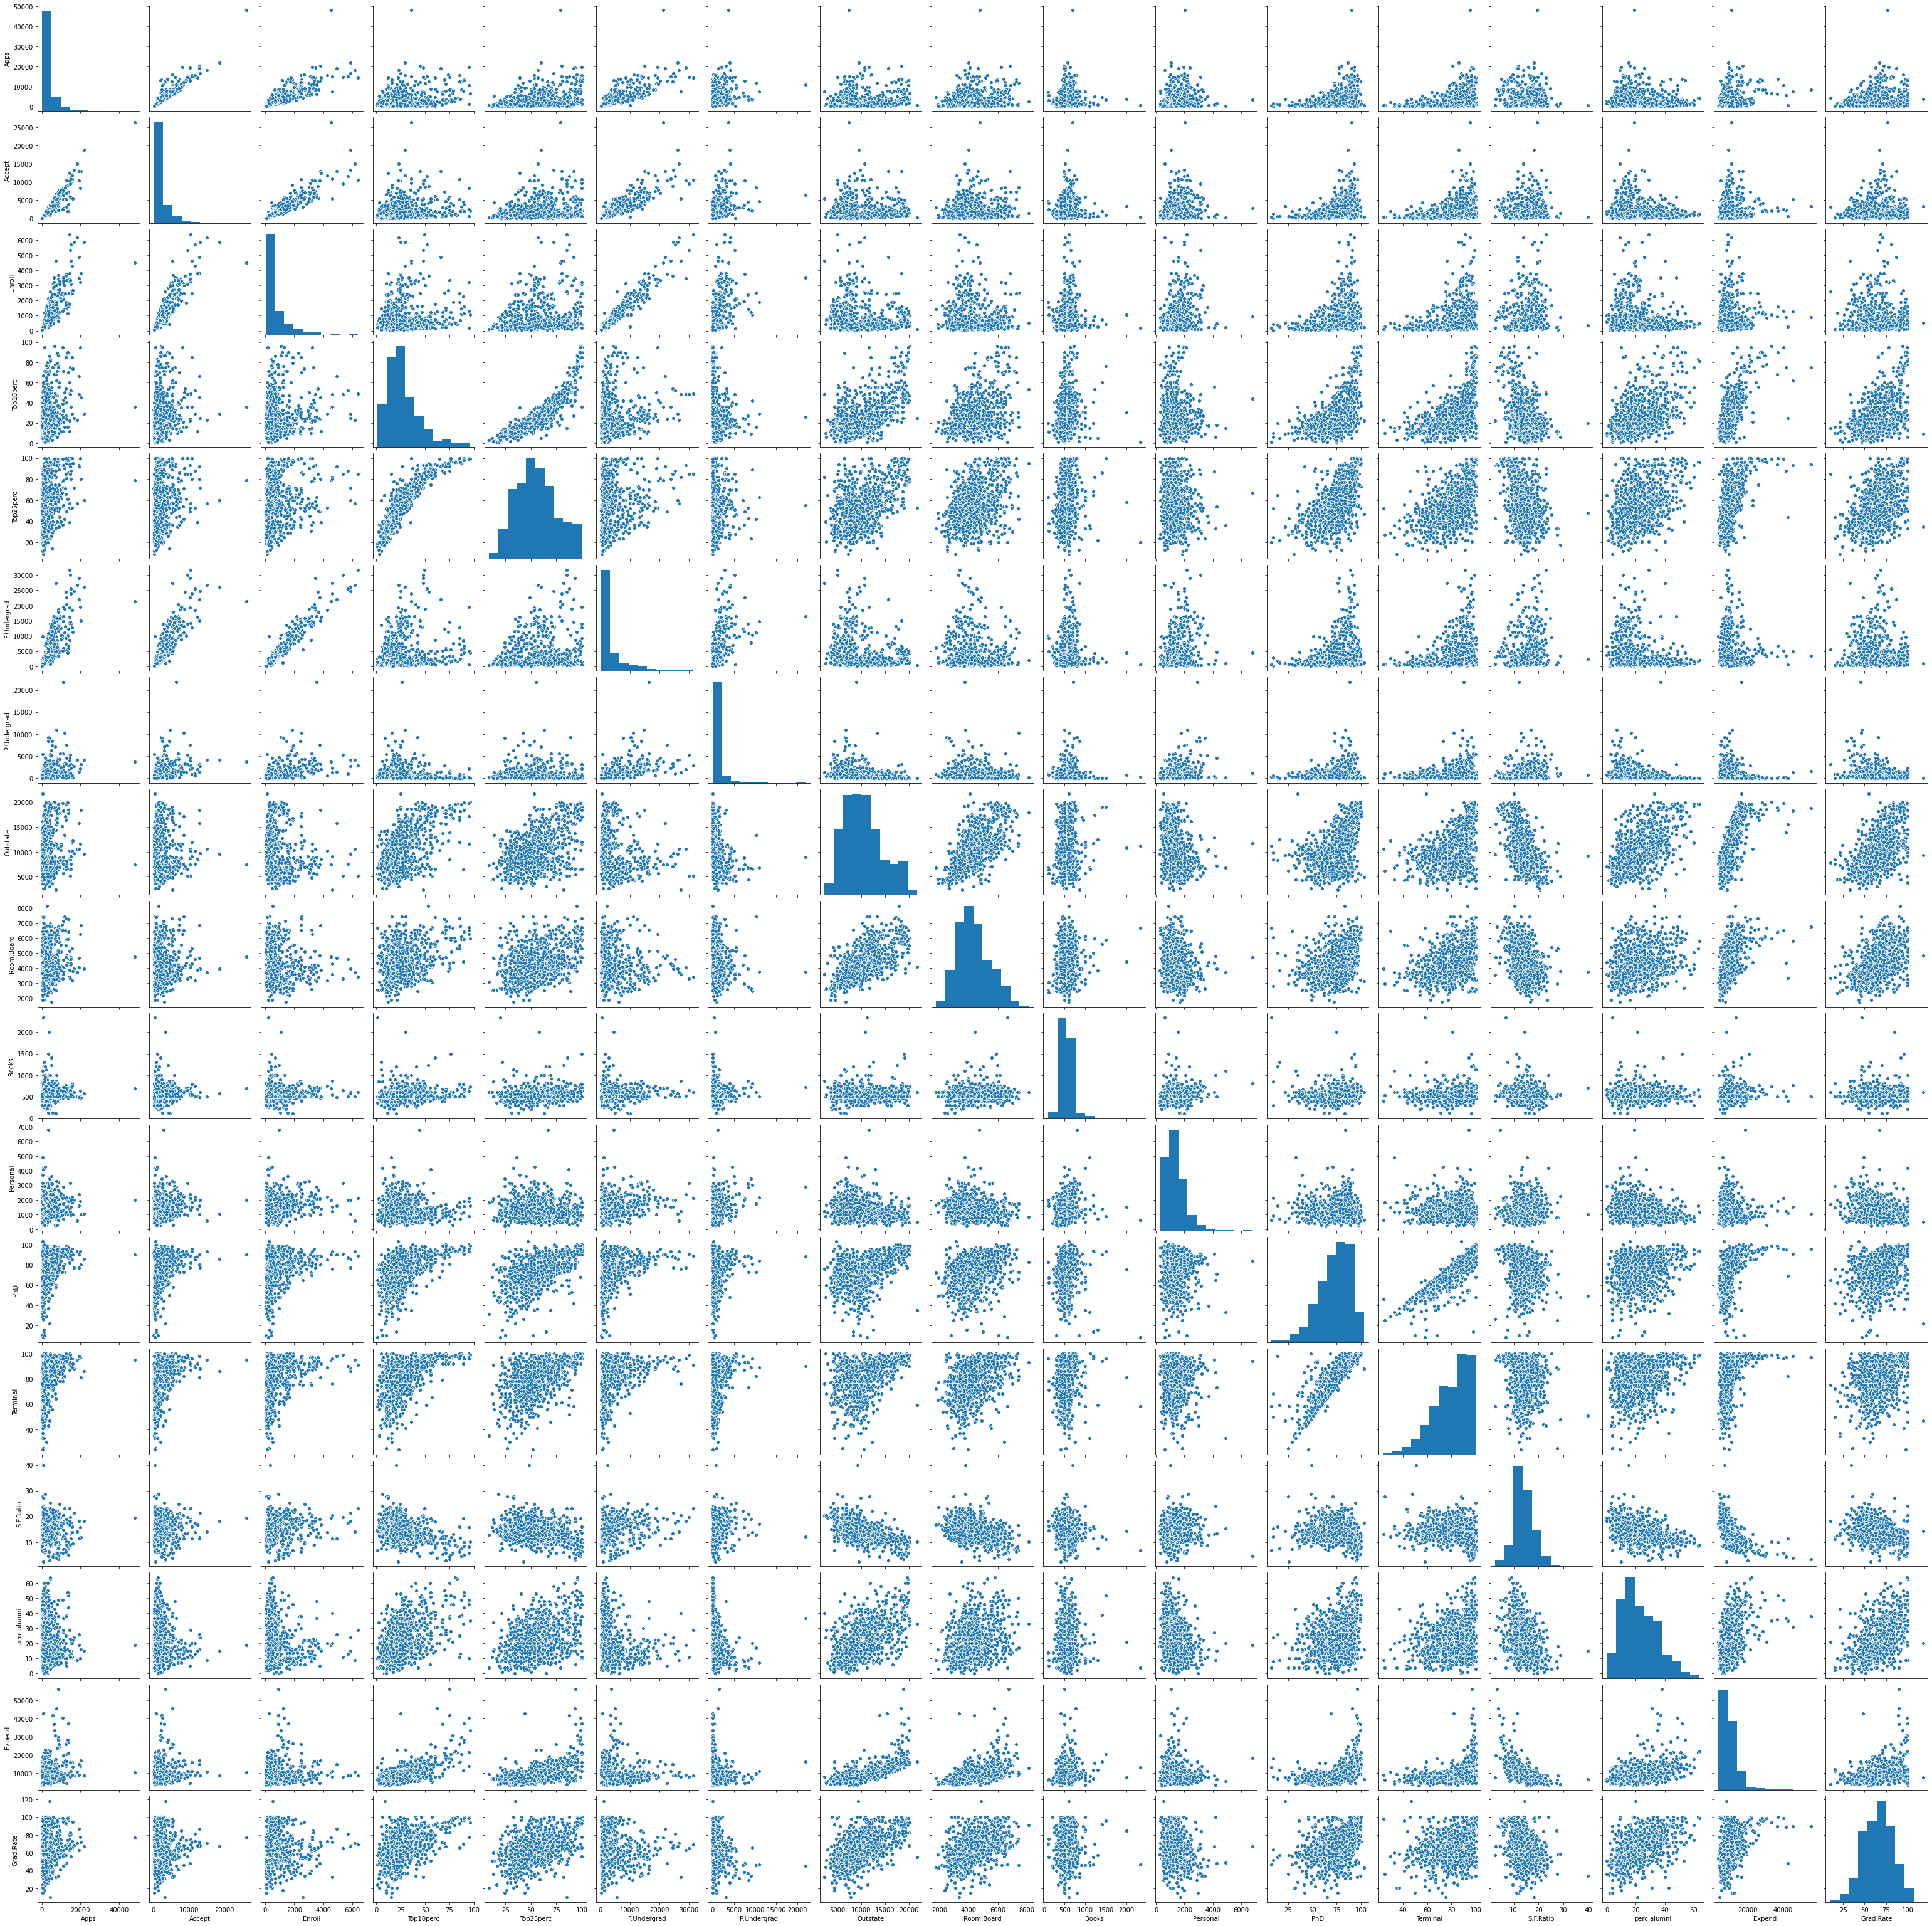

In [44]:
sns.pairplot(PCA_df)
plt.savefig('Pairplot.png')

In [24]:
correlation = PCA_df.corr()
correlation.style.set_precision(2)

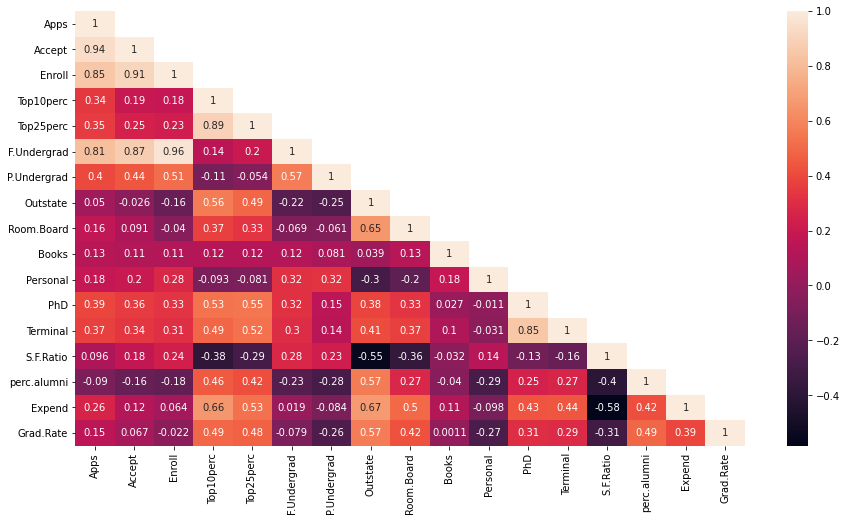

In [48]:
plt.figure(figsize=(15,8))
msk = np.triu(correlation, +1)
sns.heatmap(correlation,mask = msk, annot=True )
plt.savefig('Corr.png')

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [25]:
sample_scale=PCA_df.describe().T
dfi.export(sample_scale, 'sample_scale')
sample_scale

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

Yes, Scaling is necessary for PCA in this case. Here we can observe all the columns have different scales, some of them have very short range i.e., from 2.5 to 39.8 and some have very high range from 81 to 48094.

hence we need to scale the data to bring all of them to same scale.

In [26]:
from sklearn.preprocessing import StandardScaler
pca_scaled = pd.DataFrame(StandardScaler().fit_transform(PCA_df), columns=PCA_df.columns, index=PCA_df.index)

In [27]:
pca_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [28]:
scaled_df= pca_scaled.describe().T
dfi.export(scaled_df, 'scaled_df.png')
scaled_df

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [29]:
corr= pca_scaled.corr().style.background_gradient(cmap='viridis')
#dfi.export(corr, 'Scaled correlation.png')
corr

In [30]:
cov= pca_scaled.cov().style.background_gradient(cmap='viridis')
#dfi.export(cov, 'Scaled cov.png')
cov


## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

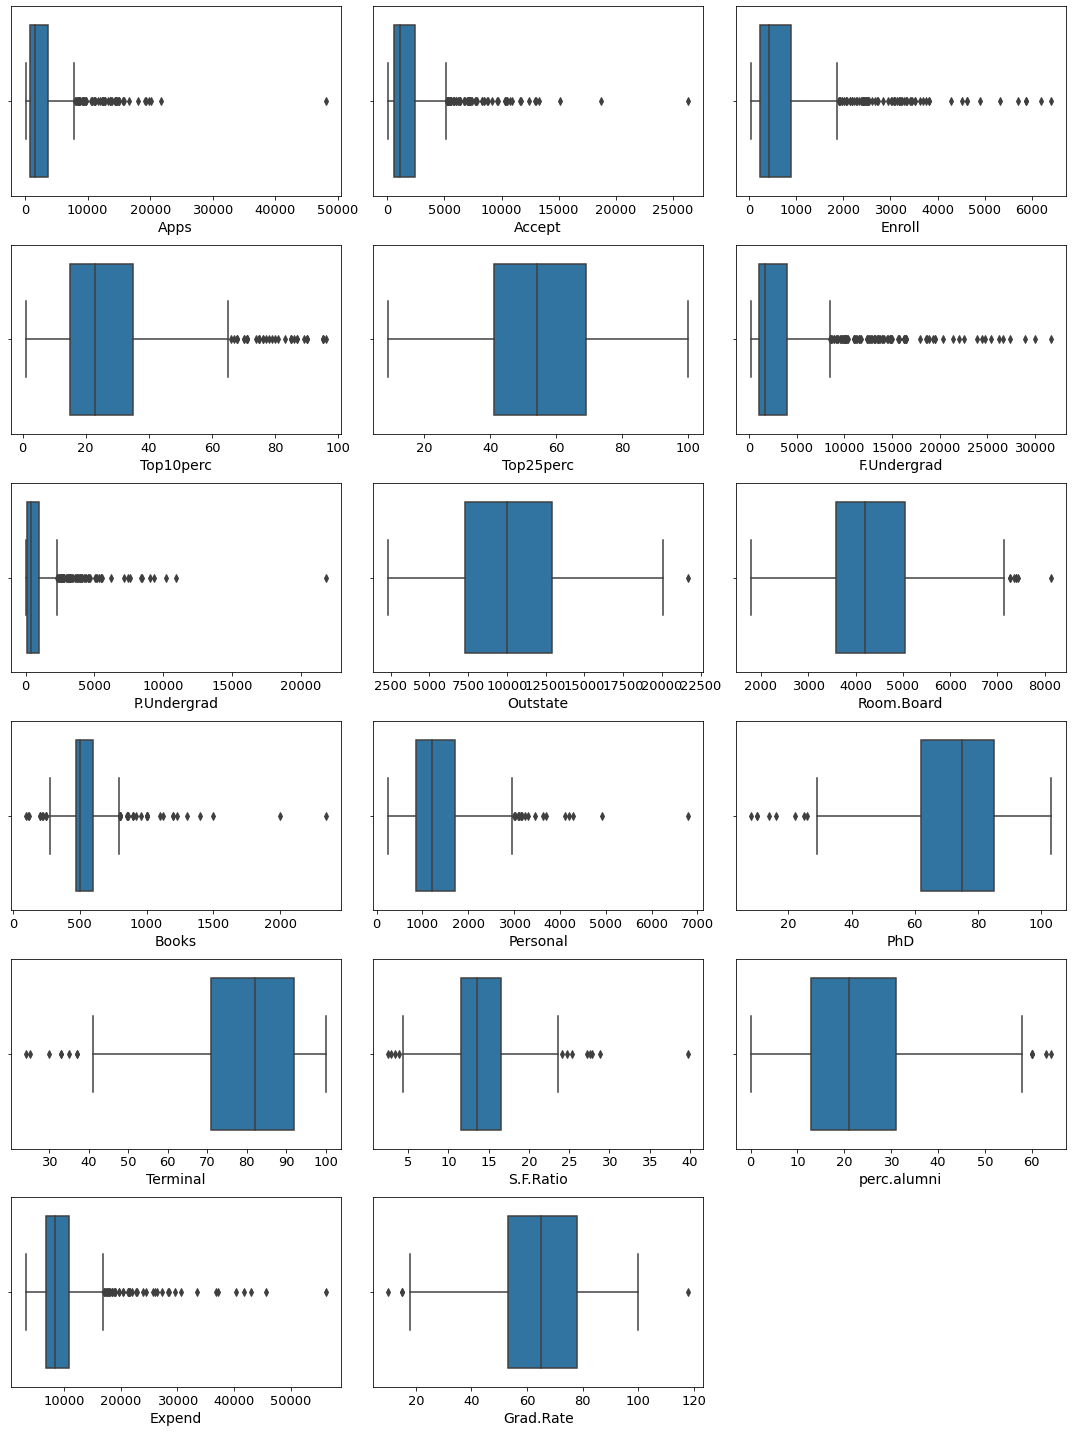

In [34]:
plt.figure(figsize=(15,20))
for i in np.arange(len(PCA_df.columns)):
    plt.subplot(6,3, i+1)
    sns.boxplot(PCA_df.iloc[:,i])
    plt.xlabel(PCA_df.columns[i], fontsize=14)
    plt.xticks(fontsize=13)
    plt.savefig('boxplot unscaled.png')
    plt.tight_layout()

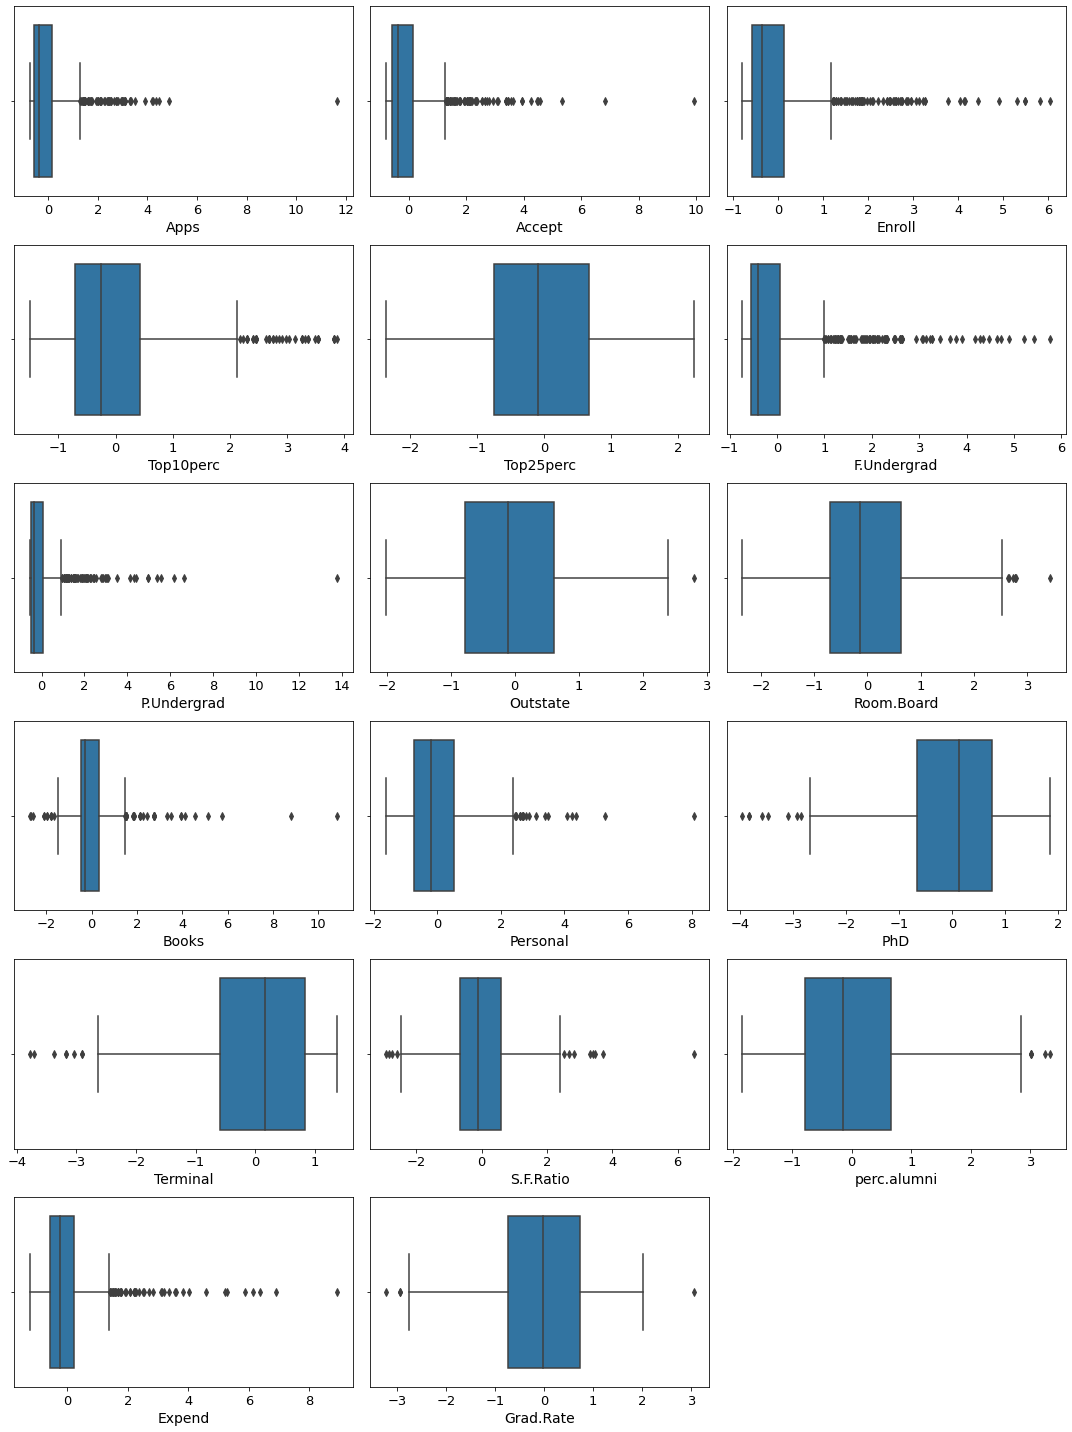

In [37]:
plt.figure(figsize=(15,20))
for i in np.arange(len(PCA_df.columns)):
    plt.subplot(6,3, i+1)
    sns.boxplot(pca_scaled.iloc[:,i])
    plt.xlabel(PCA_df.columns[i], fontsize=14)
    plt.xticks(fontsize=13)
    plt.savefig('boxplot_scaled.png')
    plt.tight_layout()

Outliers do not change when scaling is performed, while performing scaling only the scale of data gets change rest everything will be same as before.

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [43]:
pip install factor-analyzer


  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=d363a9c2453e02b625d1f27731807ddd95b12978ac3ef24deb005701345389d0
  Stored in directory: c:\users\manisha\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


ho: sigma1= sigma2 = sigma3 = sigmak 

h1: alteast one pair of sigma is not equal

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_2_stats, p_value = calculate_bartlett_sphericity(pca_scaled)
p_value #if the p_value is less than 0.05 can proceed with PCA

0.0

In [32]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(pca_scaled)
print('Since kmo_model value {}  > 0.7. Hence, we can proceed with PCA'.format(kmo_model))

Since kmo_model value 0.8131251200373523  > 0.7. Hence, we can proceed with PCA


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_final = pca.fit_transform(pca_scaled)

In [34]:
pca.explained_variance_ #Eigen Values

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [35]:
pca.components_ #Eigen Vectors

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

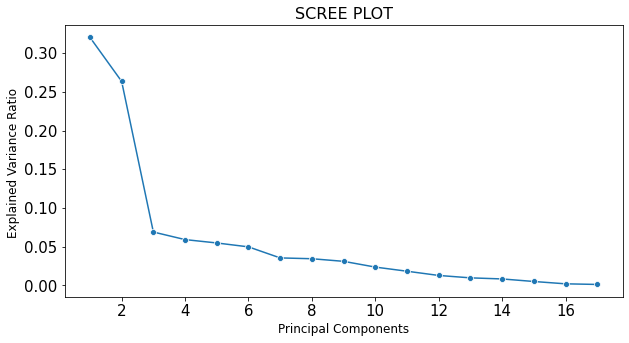

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,18), y=pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio ', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('SCREE PLOT', fontsize=16)
plt.savefig('Screeplot.png')

In [37]:
pca_new_df = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
pca_final_df = pd.DataFrame(pca_final, columns=pca_new_df)
pca_final_df # Final form of PCs in Dataframe

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443   
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753   
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276   
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356   
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220   
..        ...       ...       ...       ...       ...       ...       ...   
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429 -0.165021   
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343  0.848453   
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014 -1.317492   
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937  0.083328   
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893  1.307313   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0   -0.879386  0.093084  0.048593  0.399747 -0.089690 -0.052098  0.180140   
1    0.046925  1.113780  0.965154 -0.212509  0.097239 -0.243518 -0.744204   
2    0.308740 -0.105452  0.640660 -0.154993 -0.344731  0.097551  0.227527   
3   -0.147694  0.378997  0.461244 -0.420651  0.687143 -0.075461 -0.003380   
4   -0.624413 -0.160383  0.363428 -0.153339 -0.050552  0.267207 -0.614409   
..        ...       ...       ...       ...       ...       ...       ...   
772  0.347435  0.545218  0.876458  0.447952 -0.029980  0.274732 -0.392414   
773  0.626515 -0.072041 -0.311567  0.012782  0.201674 -0.088843 -0.339420   
774 -0.128288  0.212375  0.300443 -0.471931  0.448232  0.083219 -0.041142   
775 -0.552586  0.081969  0.924892  2.242207  1.363251  0.076113 -0.074911   
776  0.627410  0.723562 -1.208948  0.207169  0.785628  0.432977 -0.101576   

         PC15      PC16      PC17  
0    0.001752 -0.093140  0.093552  
1    0.103710 -0.050256 -0.174057  
2   -0.022558 -0.004053  0.003759  
3   -0.073181 -0.191546 -0.175254  
4   -0.273993  0.010653  0.048344  
..        ...       ...       ...  
772  0.048877  0.069005  0.012057  
773  0.081479 -0.111415 -0.046808  
774  0.067901 -0.232024 -0.099938  
775  0.353597  0.304416  0.335105  
776 -0.114873 -0.117076 -0.002572  

[777 rows x 17 columns]

In [38]:
pca_scaled.dot(pca.components_[0])

0     -1.592855
1     -2.192402
2     -1.430964
3      2.855557
4     -2.212008
         ...   
772   -3.328458
773    0.199389
774   -0.732561
775    7.919327
776   -0.469508
Length: 777, dtype: float64

In [39]:
for i in range(0,17):
    x= pca_scaled.iloc[0].dot(pca.components_[i])
    print(x)

-1.592855403548163
0.7673335099647794
-0.10107353731057767
-0.9217493979898983
-0.7439753978495607
-0.29830608096396916
0.6384434679959219
-0.8793861370426541
0.09308394386703972
0.04859274733320146
0.39974718792984765
-0.08968973153836765
-0.05209844615260792
0.1801396876475963
0.001752395023308359
-0.09314006976917491
0.09355220226975627


## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [40]:
pca_new_df = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
pca_loadings= pd.DataFrame(pca.components_.T, columns=pca_new_df, index=pca_scaled.columns).style.background_gradient(cmap='viridis').set_precision(2)
dfi.export(pca_loadings, 'pca_loadings.png')
pca_loadings

## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

PC1 = 0.25Apps + 0.21Accept + 0.18Enroll + 0.35Top10perc + 0.34Top25perc + 0.15 F.Undergrad + Outstate0.29 + Room.Board0.25 + Room.Board0.25 + Books*0.06 + Personal-0.04 + PhD0.32 + Terminal*0.32 + S.F.Ratio-0.18 + perc.alumni0.21 + Expend0.32 + Grad.Rate*0.25

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [43]:
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [55]:
pca = PCA(n_components=5)
a_pca = pca.fit_transform(pca_scaled)
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309206, -0.10124911, -0.08298561,  0.03505552, -0.02414793,
        -0.06139292,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131048,  0.26781741,  0.16182683, -0.05154724, -0.10976655,
         0.10041226, -0.15855848,  0.13129135,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118948,  0.01731422,
         0.0792735 

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university. 

To understand more about the dataset, we performed univariate and multivariate analysis which gives us the understanding about the variables.

From univariate analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. 

From multivariate analysis we can understand the correlation of variables.

Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. 

The scaling helps us to standardize the variable in one scale. 

Outliers are imputed using IQR values once the values are imputed, we can perform PCA. 

The principal component analysis (PCA) is used reduce the multicollinearity between the variables. 
Depending on the variance of the dataset we can reduce the PCA components. 

The PCA components for this business case are 5 where we can be able to understand the maximum variance of the dataset.

Using these components, we can now understand the reduced multicollinearity in the dataset. with this analysis we can perform further analysis and model building.


# THE END!!!